# Modelado de los datos

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import os
from imblearn.combine import SMOTEENN
from sklearn import set_config

In [2]:
#Global variables in notebook
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)
warnings.simplefilter("ignore")
#Global variables in notebook
random_seed = 42
set_config(print_changed_only=False)
path_train_data = '../../../data/processed/train_data.csv'
path_test_data = '../../../data/processed/test_data.csv'
target_var = 'fraud_bool'

In [3]:
train_data = pd.read_csv(path_train_data)
train_data

,payment_type_AC,proposed_credit_limit,customer_age,housing_status_BC,date_of_birth_distinct_emails_4w,name_email_similarity,credit_risk_score,email_is_free,device_os_linux,zip_count_4w,device_os_windows,has_other_cards,device_os_other,income,employment_status_CA,bank_months_count,housing_status_BE,housing_status_BA,bank_branch_count_8w,keep_alive_session,housing_status_BB,current_address_months_count,phone_home_valid,fraud_bool
0,1,0.000000,0.0,0,0.428571,-0.448030,-0.106383,1,1,0.901530,0,0,0,0.2,0,-0.230769,0,0,-0.375000,0,1,-0.118182,1,0
1,0,0.000000,0.0,0,0.714286,0.621624,-0.968085,0,0,-0.127151,0,0,1,-1.0,0,0.230769,1,0,0.000000,1,0,1.709091,1,0
2,1,2.548387,-0.5,0,-0.142857,0.245367,0.904255,0,1,-0.004780,0,1,0,-0.6,1,-0.230769,1,0,-0.333333,1,0,0.045455,0,0
3,1,4.193548,-0.5,0,0.428571,-0.688465,0.819149,0,0,-0.239962,0,1,1,0.4,1,-0.230769,0,0,-0.375000,1,1,-0.072727,0,0
4,0,0.000000,0.5,0,-0.714286,0.491348,-0.702128,1,1,3.543021,0,0,0,-1.0,1,1.000000,0,0,0.500000,1,1,0.590909,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
783387,1,5.806452,1.5,1,-0.571429,-0.334276,0.936170,0,1,1.466539,0,0,0,0.4,1,-0.230769,0,0,-0.333333,0,0,1.081818,0,0
783388,1,0.967742,0.0,0,0.285714,-0.114840,0.436170,1,1,-0.911090,0,0,0,0.2,1,-0.230769,0,1,-0.333333,0,0,-0.327273,0,0
783389,1,0.000000,0.5,1,0.142857,-0.500296,0.755319,0,0,-0.461759,0,0,1,0.4,1,-0.230769,0,0,-0.375000,0,0,-0.345455,0,0
783390,0,0.000000,0.0,0,-0.142857,0.467755,-0.478723,1,1,-0.670172,0,0,0,-0.2,1,0.000000,0,0,88.208333,0,0,1.218182,1,0


In [4]:
test_data = pd.read_csv(path_test_data)
test_data

,payment_type_AC,proposed_credit_limit,customer_age,housing_status_BC,date_of_birth_distinct_emails_4w,name_email_similarity,credit_risk_score,email_is_free,device_os_linux,zip_count_4w,device_os_windows,has_other_cards,device_os_other,income,employment_status_CA,bank_months_count,housing_status_BE,housing_status_BA,bank_branch_count_8w,keep_alive_session,housing_status_BB,current_address_months_count,phone_home_valid,fraud_bool
0,0,0.967742,0.0,0,0.285714,-0.435361,-0.797872,0,1,-0.133843,0,0,0,0.2,1,-0.230769,0,0,0.208333,1,1,-0.354545,1,0
1,1,0.000000,0.5,0,-0.142857,-0.434378,-0.297872,1,1,0.719885,0,1,0,-1.0,1,-0.230769,0,0,-0.333333,0,1,-0.027273,0,0
2,0,0.000000,1.5,0,-0.571429,0.576962,-0.542553,1,0,-0.114723,1,0,0,-1.0,1,0.961538,0,0,58.916667,1,1,0.581818,0,0
3,0,2.580645,1.0,0,0.571429,-0.419084,1.031915,0,1,-0.341300,0,0,0,0.2,1,-0.230769,0,1,-0.333333,1,0,-0.045455,0,0
4,0,4.193548,-0.5,0,1.571429,-0.880129,1.404255,1,1,3.756214,0,0,0,-1.0,1,0.769231,1,0,-0.166667,0,0,1.327273,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195843,0,0.000000,-0.5,0,2.571429,-0.393008,-0.882979,1,0,0.481836,0,0,1,-1.0,1,0.230769,1,0,0.250000,0,0,1.081818,0,0
195844,0,0.000000,-0.5,0,1.142857,0.039996,-0.223404,1,0,-0.736138,1,0,0,0.0,1,0.884615,1,0,-0.333333,0,0,0.063636,1,0
195845,0,0.967742,-0.5,0,0.571429,0.184881,0.361702,1,0,0.173040,0,0,1,0.2,1,0.807692,1,0,50.458333,0,0,2.200000,0,0
195846,0,0.000000,0.5,1,0.571429,0.010655,-0.276596,1,0,-0.315488,1,0,0,-0.6,1,0.884615,0,0,0.291667,0,0,0.100000,0,0


In [5]:
X_test = test_data.drop(columns=[target_var])
y_test = test_data[target_var]

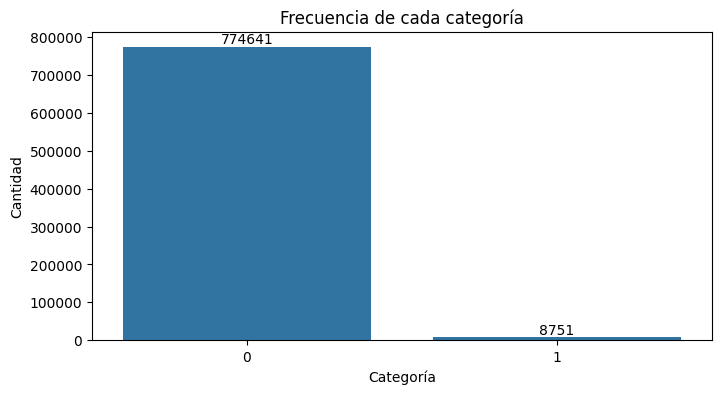

In [6]:
conteo = train_data['fraud_bool'].value_counts()

# Crear el gráfico de barras
plt.figure(figsize=(8,4))
bar_plot = sns.barplot(x=conteo.index, y=conteo.values)

# Agregar las etiquetas sobre las barras
for i, value in enumerate(conteo.values):
    bar_plot.text(i, value + 0.1, str(value), ha='center', va='bottom', fontsize=10)

# Personalizar el gráfico
plt.xlabel("Categoría", fontsize=10)
plt.ylabel("Cantidad", fontsize=10)
plt.title("Frecuencia de cada categoría", fontsize=12)

plt.show()

In [7]:
#División de las caracteristicas y la variable objetivo
X_train = train_data.drop(columns=[target_var])
y_train = train_data[target_var]

## Manejo del desbalanceo de los datos
### SMOTEENN para el balanceo de los datos
El algoritmo SMOTEENN combina dos técnicas de balanceo de clases: SMOTE (Synthetic Minority Over-sampling Technique) y ENN (Edited Nearest Neighbors). Está diseñado para abordar el desequilibrio de clases en conjuntos de datos de clasificación binaria.
Primero aplica SMOTE para generar muestras sintéticas de la clase minoritaria, lo que aumenta su tamaño. Luego aplica ENN para eliminar ejemplos de la clase mayoritaria que están cerca de la frontera de decisión con la clase minoritaria, lo que reduce su tamaño.

In [8]:
#División de las caracteristicas y la variable objetivo
X = train_data.drop(columns=[target_var])
y = train_data[target_var]

x_path_train_smoteenn_data = '../../../data/final/x_train_smoteenn_data.csv'
y_path_train_smoteenn_data = '../../../data/final/y_train_smoteenn_data.csv'

if os.path.isfile(x_path_train_smoteenn_data) and os.path.isfile(y_path_train_smoteenn_data):
    X_train_smoteenn = pd.read_csv(x_path_train_smoteenn_data)
    y_train_smoteenn = pd.read_csv(y_path_train_smoteenn_data)
else:
    smote_enn = SMOTEENN(random_state=random_seed, n_jobs=-1)
    X_train_smoteenn, y_train_smoteenn = smote_enn.fit_resample(X, y)
    X_train_smoteenn.to_csv(x_path_train_smoteenn_data,index=False)
    y_train_smoteenn.to_csv(y_path_train_smoteenn_data,index=False)


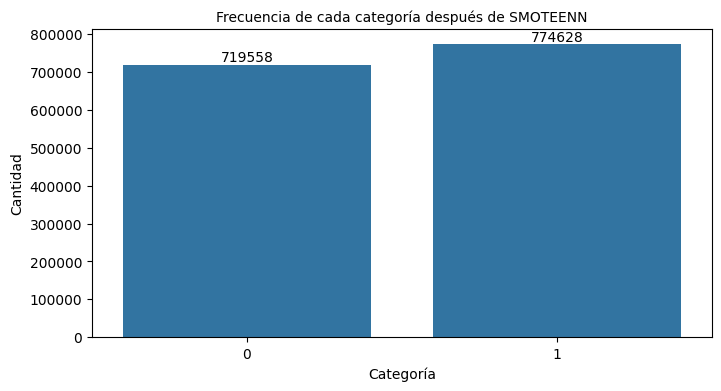

In [9]:
conteo_resampled = y_train_smoteenn.value_counts().sort_index()
conteo_resampled = conteo_resampled.reset_index(drop=True)
plt.figure(figsize=(8,4))
bar_plot_ = sns.barplot(x=conteo_resampled.index, y=conteo_resampled.values)

for i, value in enumerate(conteo_resampled.values):
    bar_plot_.text(i, value, str(value), ha='center', va='bottom', fontsize=10)

plt.xlabel("Categoría", fontsize=10)
plt.ylabel("Cantidad", fontsize=10)
plt.title("Frecuencia de cada categoría después de SMOTEENN", fontsize=10)

plt.show()

## Mejor parametros para los modelos
Entrenar modelos y ajustar los hiperparámetros para optimizar el rendimiento del modelo en términos de precisión y sensibilidad en la detección de fraude en la apertura de cuentas bancarias.

In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV,cross_val_score
import mlflow
import mlflow.sklearn
from xgboost import XGBClassifier
import mlflow.xgboost
from scipy.stats import randint
from sklearn.metrics import f1_score, accuracy_score,confusion_matrix, ConfusionMatrixDisplay,precision_score,recall_score,roc_auc_score,roc_curve,classification_report
import tensorflow as tf
from sklearnex import patch_sklearn
from scipy.stats import loguniform
import random
from joblib import dump,load
patch_sklearn()


Intel(R) Extension for Scikit-learn* enabled (https://github.com/uxlfoundation/scikit-learn-intelex)


In [11]:
n_iter = 100
mlflow.set_experiment(experiment_name="Prueba #2.0 (Best hyperparameters)")

<Experiment: artifact_location='file:///c:/Users/jonat/Desktop/FraudDetectML/notebooks/modelado/parameter_optimization/mlruns/486260022929697088', creation_time=1744685104233, experiment_id='486260022929697088', last_update_time=1744685104233, lifecycle_stage='active', name='Prueba #2.0 (Best hyperparameters)', tags={}>

In [12]:
def evaluate_performance(Model, Xtrain, Xtest, Ytrain, Ytest,run_name):
    
    with mlflow.start_run(run_name=run_name):
        
        # Realizar la validación cruzada
        overall_score = cross_val_score(Model, Xtrain, Ytrain, cv=5)
        model_score = np.average(overall_score)
        
        # Hacer predicciones
        Ypredicted = Model.predict(Xtest)
    
        # Calcular las métricas
        training_accuracy = Model.score(Xtrain, Ytrain) * 100
        test_accuracy = accuracy_score(Ytest, Ypredicted) * 100
        precision = np.round(precision_score(Ytest, Ypredicted, average='weighted') * 100, 2)
        recall = np.round(recall_score(Ytest, Ypredicted, average='weighted') * 100, 2)
        f1 = np.round(f1_score(Ytest, Ypredicted, average='weighted') * 100, 2)

        
        # Registrar los parámetros y métricas en MLflow
        mlflow.log_param("model", Model.__class__.__name__)  # Puedes registrar el tipo de modelo
        mlflow.log_metric("training_accuracy", training_accuracy)
        mlflow.log_metric("cross_validation_score", model_score * 100)
        mlflow.log_metric("test_accuracy", test_accuracy)
        mlflow.log_metric("precision", precision)
        mlflow.log_metric("recall", recall)
        mlflow.log_metric("f1_score", f1)

        # Imprimir los resultados
        print("\n • Training Accuracy Score : ", round(training_accuracy, 2))
        print(f" • Cross Validation Score : {round(model_score * 100, 2)}")
        print(f" • Testing Accuracy Score :{round(test_accuracy, 2)}")
        print(f" • Precision Score is : {precision}")
        print(f" • Recall Score is : {recall}")
        print(f" • F1-Score Score is : {f1}")
        if hasattr(Model, "predict_proba"):
            roc_auc = roc_auc_score(Ytest, Model.predict_proba(Xtest)[:, 1])
            mlflow.log_metric("roc_auc", roc_auc)
            print(f' • ROC AUC Score: {roc_auc:.2f}')
        else:
            roc_auc = None

        
        # Registrar el modelo entrenado en MLflow
        mlflow.sklearn.log_model(Model, run_name)

def evaluate_performance_ann(Model, Xtrain, Xtest, Ytrain, Ytest, run_name):
    
    with mlflow.start_run(run_name=run_name):
        Ypredicted_proba = Model.predict(Xtest)
        
        # Binarizar las predicciones (si es necesario)
        Ypredicted = (Ypredicted_proba > 0.5).astype(int)
        
        # Calcular las métricas
        training_accuracy = Model.evaluate(Xtrain, Ytrain, verbose=0)[1] * 100  # Precisión de entrenamiento
        test_accuracy = accuracy_score(Ytest, Ypredicted) * 100  # Precisión de prueba
        precision = np.round(precision_score(Ytest, Ypredicted, average='weighted') * 100, 2)
        recall = np.round(recall_score(Ytest, Ypredicted, average='weighted') * 100, 2)
        f1 = np.round(f1_score(Ytest, Ypredicted, average='weighted') * 100, 2)
        
        # Registrar los parámetros y métricas en MLflow
        mlflow.log_param("model",  Model.name)  # Registrar el tipo de modelo
        mlflow.log_metric("training_accuracy", training_accuracy)
        mlflow.log_metric("test_accuracy", test_accuracy)
        mlflow.log_metric("precision", precision)
        mlflow.log_metric("recall", recall)
        mlflow.log_metric("f1_score", f1)
        
        # Imprimir los resultados
        print("\n • Training Accuracy Score : ", round(training_accuracy, 2))
        print(f" • Testing Accuracy Score :{round(test_accuracy, 2)}")
        print(f" • Precision Score is : {precision}")
        print(f" • Recall Score is : {recall}")
        print(f" • F1-Score Score is : {f1}")
        
        # Calcular el ROC AUC Score usando las probabilidades
        roc_auc = roc_auc_score(Ytest, Ypredicted_proba)  # Usamos las probabilidades para el AUC
        mlflow.log_metric("roc_auc", roc_auc)
        print(f' • ROC AUC Score: {roc_auc:.2f}')
        
        # Registrar el modelo entrenado en MLflow
        mlflow.keras.log_model(Model, run_name)

def display_confusion_matrix(model,X_test,y_test):
    y_pred = model.predict(X_test)
    print(classification_report(y_test, y_pred))
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap=plt.cm.Blues)
    plt.title('Matriz de Confusión')
    plt.show()

def display_confusion_matrix_ann(model, X_test, y_test):
    y_pred_prob = model.predict(X_test)
    y_pred = (y_pred_prob > 0.5).astype(int)
    print(classification_report(y_test, y_pred))
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap=plt.cm.Blues)
    plt.title('Matriz de Confusión')
    plt.show()

def plot_roc_curve(Model, Xtest, Ytest):
    if hasattr(Model, "predict_proba"):  # Verificar si el modelo tiene predict_proba
        Yscores = Model.predict_proba(Xtest)[:, 1]  # Probabilidad de clase positiva
    else:
        print("El modelo no tiene `predict_proba`. No se puede graficar la curva ROC.")
        return

    # Calcular AUC y curva ROC
    roc_auc = roc_auc_score(Ytest, Yscores)
    fpr, tpr, thresholds = roc_curve(Ytest, Yscores)

    # Graficar la curva ROC
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})', color='blue')
    plt.plot([0, 1], [0, 1], linestyle='--', color='grey', label='Random Guessing')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.grid(True)
    plt.show()

def plot_roc_curve_ann(Model, Xtest, Ytest):
    # Si el modelo devuelve una sola probabilidad para la clase positiva
    Yscores = Model.predict(Xtest)  # No es necesario usar [:, 1] si solo hay una columna

    # Calcular AUC y curva ROC
    roc_auc = roc_auc_score(Ytest, Yscores)
    fpr, tpr, thresholds = roc_curve(Ytest, Yscores)

    # Graficar la curva ROC
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})', color='blue')
    plt.plot([0, 1], [0, 1], linestyle='--', color='grey', label='Random Guessing')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.grid(True)
    plt.show()

#### Regresión logistica

**Descripción:**
La regresión logística es un algoritmo de clasificación binaria que modela la probabilidad de que una instancia pertenezca a una clase particular. Utiliza la función sigmoide para transformar una combinación lineal de las características en una probabilidad.

**Funcionamiento:**
- La función sigmoide se aplica a la combinación lineal de las características.
- El resultado de la función sigmoide es una probabilidad entre 0 y 1.
- Se clasifica la instancia en una clase u otra dependiendo de un umbral, usualmente 0.5.

**Ventajas:**
- Fácil de interpretar y de implementar.
- Rápido y eficiente con grandes conjuntos de datos.
- Proporciona probabilidades como salida, lo cual es útil para la toma de decisiones basada en riesgo.

**Desventajas:**
- No maneja bien relaciones no lineales.
- Sensible a outliers (valores atípicos). 

In [13]:
path_logistic_regresion = '../../../models/logistic_regresion.pkl'
grid_search_logistic_mdl = None
if os.path.isfile(path_logistic_regresion):
    grid_search_logistic_mdl = load(path_logistic_regresion)
else:
    model = LogisticRegression() 
    param_dist = {
        'C': loguniform(1e-4, 10),  # Distribución log-uniforme para mejor exploración
        'penalty': ['l1', 'l2'],  # Regularización Lasso (L1) o Ridge (L2)
        'solver': ['liblinear', 'saga'],  # Solvers compatibles con L1 y L2
        'max_iter': [100, 200, 300, 500],  # Iteraciones suficientes para convergencia
        'class_weight': ['balanced', None]  # Ajuste de pesos para clases desbalanceadas
    }

    random_search = RandomizedSearchCV(
        estimator=model,
        param_distributions=param_dist,
        n_iter=n_iter,  
        scoring='roc_auc',  
        cv=5,  
        n_jobs=-1, 
        random_state=random_seed
    )
    random_search.fit(X_train_smoteenn, y_train_smoteenn)
    print("Mejores parámetros de Random Search:", random_search.best_params_)
    param_grid = {
        'C': [random_search.best_params_['C'] - 0.5, random_search.best_params_['C'], random_search.best_params_['C'] + 0.5],
        'penalty': [random_search.best_params_['penalty']],
        'solver': [random_search.best_params_['solver']],
        'max_iter': [random_search.best_params_['max_iter'] - 50, random_search.best_params_['max_iter'], random_search.best_params_['max_iter'] + 50]
    }

    grid_search_logistic = GridSearchCV(
        estimator=model,
        param_grid=param_grid,
        scoring='roc_auc', 
        cv=5,  
        n_jobs=-1, 
        verbose=1
    )

    grid_search_logistic.fit(X_train_smoteenn, y_train_smoteenn)
    grid_search_logistic_mdl = grid_search_logistic.best_estimator_

    print("Mejores parámetros de Grid Search:", grid_search_logistic.best_params_)
    print("Mejor puntuación de Grid Search:", grid_search_logistic.best_score_)
    dump(grid_search_logistic_mdl,path_logistic_regresion)
print(grid_search_logistic_mdl)

LogisticRegression(C=np.float64(0.22944454507601977), class_weight=None,
                   dual=False, fit_intercept=True, intercept_scaling=1,
                   l1_ratio=None, max_iter=500, multi_class='deprecated',
                   n_jobs=None, penalty='l1', random_state=None,
                   solver='liblinear', tol=0.0001, verbose=0, warm_start=False)


#### Evaluación del modelo con los datos de prueba

              precision    recall  f1-score   support

           0       1.00      0.82      0.90    193660
           1       0.04      0.73      0.08      2188

    accuracy                           0.82    195848
   macro avg       0.52      0.77      0.49    195848
weighted avg       0.99      0.82      0.89    195848



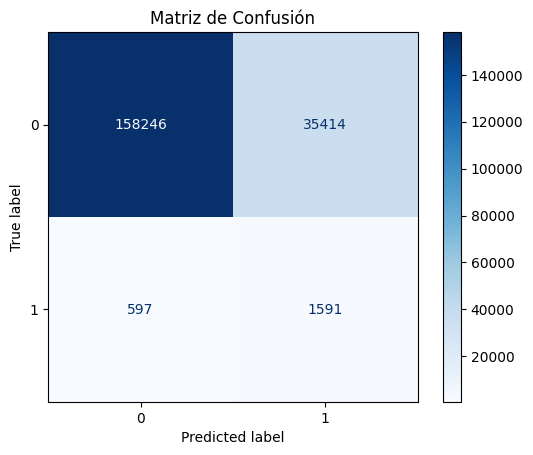

In [14]:
display_confusion_matrix(grid_search_logistic_mdl,X_test,y_test)

In [15]:
evaluate_performance(grid_search_logistic_mdl, X_train_smoteenn, X_test, y_train_smoteenn, y_test,'Logistic Regresion')


 • Training Accuracy Score :  85.62
 • Cross Validation Score : 85.62
 • Testing Accuracy Score :81.61
 • Precision Score is : 98.56
 • Recall Score is : 81.61
 • F1-Score Score is : 88.87
 • ROC AUC Score: 0.85


2025/04/14 21:50:54 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


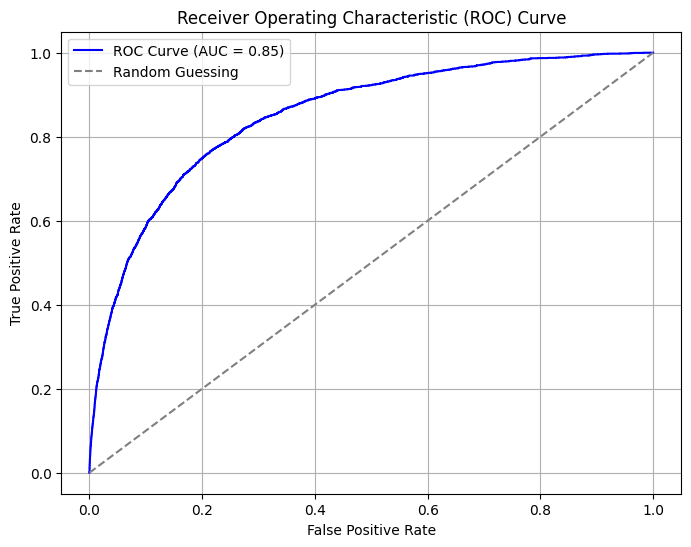

In [16]:
plot_roc_curve(grid_search_logistic_mdl, X_test, y_test)

##### XGBoost

**Descripción:**
XGBoost es un algoritmo de boosting basado en árboles de decisión que mejora la precisión combinando árboles de manera secuencial, corrigiendo los errores de los árboles anteriores. Es conocido por su alto rendimiento y eficiencia.

**Funcionamiento:**
- Boosting: Los árboles se construyen de manera secuencial, corrigiendo los errores de los anteriores.
- Optimización: Minimiza la función de pérdida mediante descenso de gradiente.
- Regularización: Ayuda a evitar el sobreajuste.
- Entrenamiento paralelo: Mejora la eficiencia en el entrenamiento.

**Ventajas:**
- Alto rendimiento y precisión.
- Maneja bien datos desbalanceados.
- Regularización para evitar el sobreajuste.
- Escala bien con grandes datasets.

**Desventajas:**
- Configuración compleja (muchos hiperparámetros).
- Tiempo de entrenamiento largo en grandes datasets.
- Difícil de interpretar.

In [17]:
path_xgb= '../../../models/xgb.pkl'
grid_search_xgb_mdl = None
random.seed(random_seed)
if os.path.isfile(path_xgb):
    grid_search_xgb_mdl = load(path_xgb)
else:
    ratio = len(y_train[y_train == 0]) / len(y_train[y_train == 1])
    xgb_model = XGBClassifier(random_state=random_seed,  use_label_encoder=False,
                              scale_pos_weight=ratio,n_jobs=-1,objective='binary:logistic')

    param_dist_xgb = {
        'n_estimators': randint(50, 201),
        'max_depth': [3, 6, 10, 15, None],
        'learning_rate': [0.01, 0.1, 0.2, 0.3],
        'subsample': [0.7, 0.8, 0.9, 1.0],
        'colsample_bytree': [0.7, 0.8, 0.9, 1.0],
        'gamma': [0, 0.1, 0.2, 0.3],
    }

    random_search_xgb = RandomizedSearchCV(estimator=xgb_model, param_distributions=param_dist_xgb, 
                                       scoring='roc_auc', n_iter=n_iter, cv=5, n_jobs=-1, random_state=random_seed)

    random_search_xgb.fit(X_train, y_train)
    best_params_random_xgb = random_search_xgb.best_params_
    print(f'Mejores parámetros encontrados con RandomizedSearchCV: {best_params_random_xgb}')

    param_grid_xgb = {
        'n_estimators': [best_params_random_xgb['n_estimators'] - 25, best_params_random_xgb['n_estimators'], best_params_random_xgb['n_estimators'] + 25],
        'max_depth': [best_params_random_xgb['max_depth'] - 1, best_params_random_xgb['max_depth'], best_params_random_xgb['max_depth'] + 1],
        'learning_rate': [best_params_random_xgb['learning_rate'] - 0.05, best_params_random_xgb['learning_rate'], best_params_random_xgb['learning_rate'] + 0.05],
        'subsample': [best_params_random_xgb['subsample'] - 0.05, best_params_random_xgb['subsample'], best_params_random_xgb['subsample'] + 0.05],
        'colsample_bytree': [best_params_random_xgb['colsample_bytree'] - 0.05, best_params_random_xgb['colsample_bytree'], best_params_random_xgb['colsample_bytree'] + 0.05],
        'gamma': [best_params_random_xgb['gamma'] - 0.1, best_params_random_xgb['gamma'], best_params_random_xgb['gamma'] + 0.1],
    }

    grid_search_xgb = GridSearchCV(estimator=xgb_model, param_grid=param_grid_xgb, 
                               scoring='roc_auc', cv=5, n_jobs=-1, verbose=1)

    grid_search_xgb.fit(X_train, y_train)
    grid_search_xgb_mdl = grid_search_xgb.best_estimator_

    print("Mejores parámetros de Grid Search:", grid_search_xgb.best_params_)
    print("Mejor puntuación de Grid Search:", grid_search_xgb.best_score_)
    dump(grid_search_xgb_mdl,path_xgb)

print("Mejores parámetros de Grid Search:", grid_search_xgb_mdl)

Mejores parámetros de Grid Search: XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=0.1, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=3,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=214,
              n_jobs=-1, num_parallel_tree=None, ...)


#### Evaluación del modelo con los datos de prueba

              precision    recall  f1-score   support

           0       1.00      0.82      0.90    193660
           1       0.05      0.80      0.09      2188

    accuracy                           0.82    195848
   macro avg       0.52      0.81      0.50    195848
weighted avg       0.99      0.82      0.89    195848



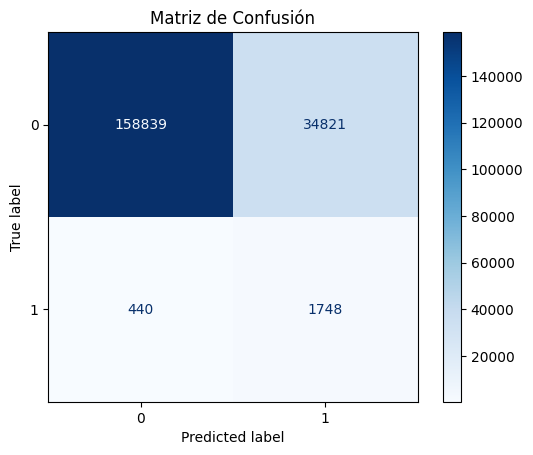

In [18]:
display_confusion_matrix(grid_search_xgb_mdl,X_test,y_test)

In [19]:
evaluate_performance(grid_search_xgb_mdl, X_train, X_test, y_train, y_test,'K-Nearest Neighbors')


 • Training Accuracy Score :  81.87
 • Cross Validation Score : 81.99
 • Testing Accuracy Score :82.0
 • Precision Score is : 98.66
 • Recall Score is : 82.0
 • F1-Score Score is : 89.1
 • ROC AUC Score: 0.89


2025/04/14 21:51:23 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


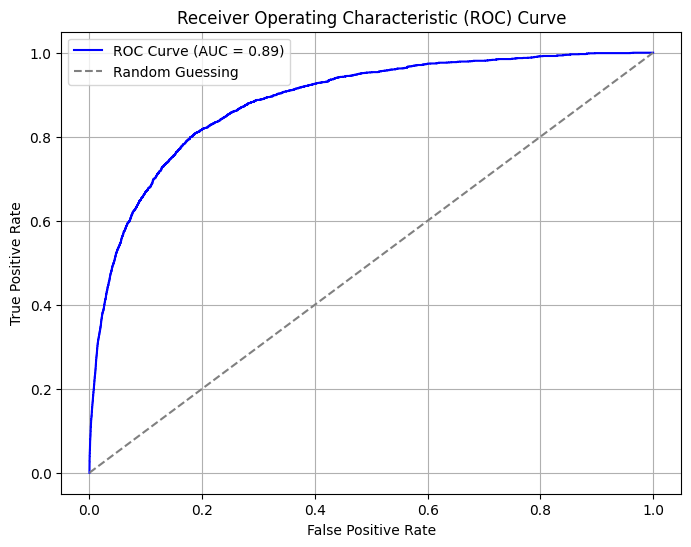

In [20]:
plot_roc_curve(grid_search_xgb_mdl, X_test, y_test)

##### Conclusión
Se selecciona el modelo XGBoost por el modelo evaluado cumple con los objetivos establecidos para la detección de fraude en la apertura de cuentas bancarias, presentando un desempeño competitivo y robustez suficiente para su implementación en entornos reales, contribuyendo a la toma de decisiones en el ámbito bancario.

## Analisis del mejor modelo obtenido

In [21]:
import xgboost as xgb

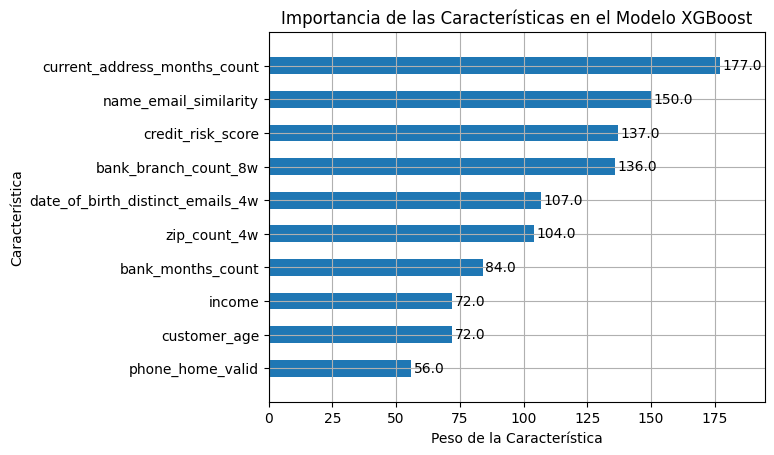

In [22]:
xgb.plot_importance(grid_search_xgb_mdl, importance_type='weight', max_num_features=10, height=0.5)

# Títulos y etiquetas
plt.title('Importancia de las Características en el Modelo XGBoost')
plt.xlabel('Peso de la Característica')
plt.ylabel('Característica')
plt.show()